# 70 Dog Breeds Neural Net

Data Exploration Stage:

In [70]:
import pandas as pd
import seaborn as sns


Loading the train test and valid data sets

In [71]:
train =  pd.read_csv('dogs.csv')
test =  pd.read_csv('dogs.csv')
valid =  pd.read_csv('dogs.csv')
data_all = pd.read_csv('dogs.csv')

Modifying so they have the right train test and valid values.

In [72]:
train = train[train.dataset == 'train']
test = test[test.dataset == 'test']
valid = valid[valid.dataset == 'valid']


In [73]:
display(valid)

,filepaths,labels,dataset
8646,valid/Afghan/01.jpg,Afghan,valid
8647,valid/Afghan/02.jpg,Afghan,valid
8648,valid/Afghan/03.jpg,Afghan,valid
8649,valid/Afghan/04.jpg,Afghan,valid
8650,valid/Afghan/05.jpg,Afghan,valid
...,...,...,...
9341,valid/Yorkie/06.jpg,Yorkie,valid
9342,valid/Yorkie/07.jpg,Yorkie,valid
9343,valid/Yorkie/08.jpg,Yorkie,valid
9344,valid/Yorkie/09.jpg,Yorkie,valid


Showing an example image.
All images are in the resolution of 224x224 and do not require any resizing or cropping or normalization by us.<br> 
Number of Images: 93406<br> 
Number of Training Images: 7946<br> 
Number of Test Images: 700<br> 
Number of Valid Images: 700<br> 


'test/Afghan/01.jpg'

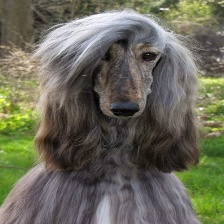

In [74]:
from IPython.display import Image
imgname = test.filepaths[7946]
display(imgname)
Image(filename= imgname) 

Showing all the unique types of breeds in the data set. Which we will use to form our classes<br>
We noticed here that there was a typo in the dog breed "American Spaniel" that divided it into two seperate classes. We fixed this by using the replace function and now it is all uniform.

In [78]:
data_all['labels'] = data_all['labels'].replace(['American  Spaniel'], 'American Spaniel')
breeds = data_all['labels'].unique()
display(breeds)


array(['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless',
       'American Spaniel', 'Basenji', 'Basset', 'Beagle',
       'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim',
       'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi',
       'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier',
       'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow',
       'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote',
       'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound',
       'French Bulldog', 'German Sheperd', 'Golden Retriever',
       'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael',
       'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor',
       'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese',
       'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull',
       'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler',
       'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei',
       'Shiba In

In [79]:

num_breeds = []
for name in breeds:
    num_breeds.append(len(data_all[data_all.labels == name])) 
  



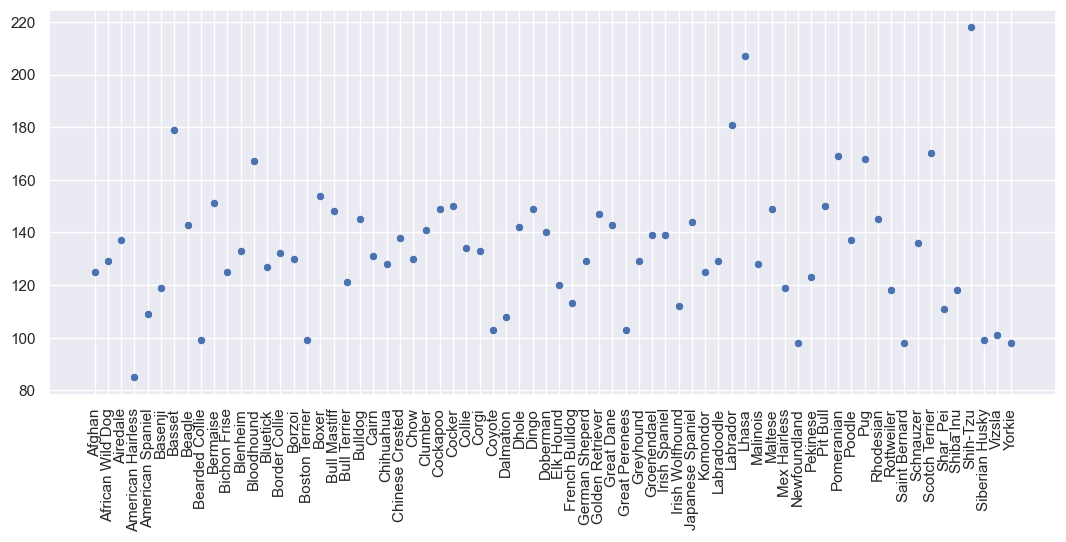

In [80]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.scatterplot(x = breeds, y = num_breeds)
ax.tick_params(axis='x', rotation=90)
